In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Creando la muestra

In [14]:
#data = pd.read_csv("data/AmazonProductReview.csv")
#data = pd.read_csv("/content/AmazonProductReview.csv")
data = pd.read_csv("data/Reviews.csv")

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [16]:
data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [17]:
missing_values = ((data.isnull().sum())/len(data))*100
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)

# % DE DATOS FALTANTES POR COLUMNA
pd.set_option('display.max_rows', None)
print(missing_values)
pd.reset_option('display.max_rows')

Summary        0.004750
ProfileName    0.004574
dtype: float64


In [18]:
# Como podemos observar, hay muy pocos valores faltantes en las columnas "ProfileName" y "Summary", por lo que podemos eliminar esas filas sin problemas.
data = data.dropna(subset=['ProfileName', 'Summary'])

<Axes: xlabel='Score', ylabel='Count'>

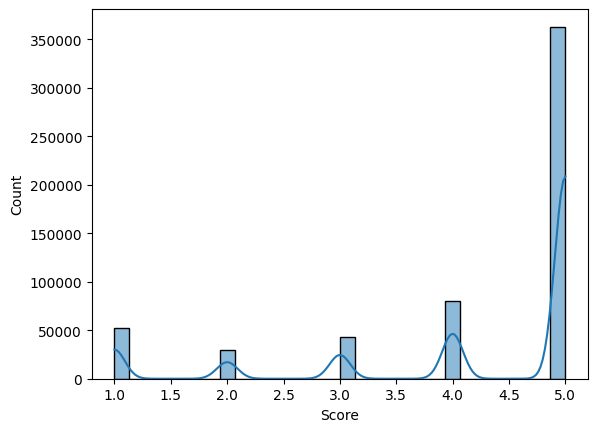

In [19]:
sns.histplot(data["Score"], bins=30, kde=True)
#Los datos se concentran en valores bajos, en especial el 0. Por lo que se realizara una imputacion de la mediana en esta columna


In [20]:
columns_to_drop = ['UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time']
df = data.drop(columns=columns_to_drop)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568401 entries, 0 to 568453
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Id         568401 non-null  int64 
 1   ProductId  568401 non-null  object
 2   Score      568401 non-null  int64 
 3   Summary    568401 non-null  object
 4   Text       568401 non-null  object
dtypes: int64(2), object(3)
memory usage: 26.0+ MB


In [22]:
df["Score"].unique()

array([5, 1, 4, 2, 3], dtype=int64)

In [23]:
df["Score"].value_counts(normalize=True)


Score
5    0.638813
4    0.141896
1    0.091949
3    0.075014
2    0.052327
Name: proportion, dtype: float64

In [24]:
#No hay duplicados
df.duplicated().sum()

0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568401 entries, 0 to 568453
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Id         568401 non-null  int64 
 1   ProductId  568401 non-null  object
 2   Score      568401 non-null  int64 
 3   Summary    568401 non-null  object
 4   Text       568401 non-null  object
dtypes: int64(2), object(3)
memory usage: 26.0+ MB


Text(0.5, 1.0, 'Distribución de Ratings')

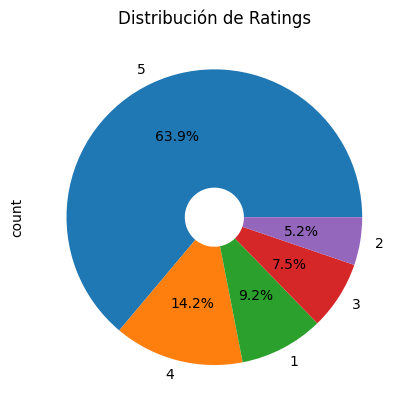

In [26]:
df["Score"].value_counts().plot(kind ="pie" , autopct='%1.1f%%', explode=(0,0,0,0,0), wedgeprops=dict(width=0.8))
plt.title("Distribución de Ratings")

In [29]:
def sentimiento(rating):
    if rating >= 4:
        return "Positivo"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negativo"

df["Sentimiento"] = df["Score"].apply(sentimiento)

Text(0.5, 1.0, 'Distribución de Sentimientos')

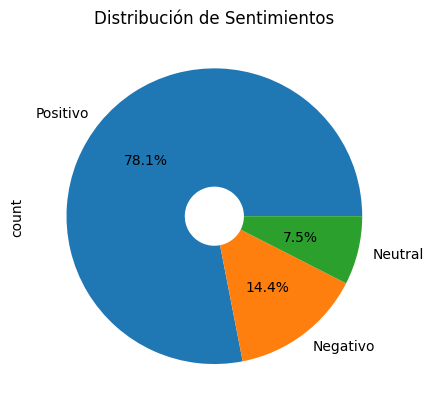

In [42]:
df["Sentimiento"].value_counts().plot(kind ="pie" , autopct='%1.1f%%', explode=(0,0,0), wedgeprops=dict(width=0.8))
plt.title("Distribución de Sentimientos")

In [55]:
df2= df.groupby('Sentimiento').apply(lambda x: x.sample(1665)).reset_index(drop=True)

C:\Users\karim\AppData\Local\Temp\ipykernel_24052\3806831491.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df2= df.groupby('Sentimiento').apply(lambda x: x.sample(1665)).reset_index(drop=True)


In [56]:
df2=df2.sort_values(by='Id', ascending=True).reset_index(drop=True)
df2

,Id,ProductId,Score,Summary,Text,Sentimiento
0,155,B000SV90J8,5,JELL-O,AWESOME!!! such a yummy flavor I got it as a h...,Positivo
1,198,B0028C44Z0,3,Sugarfree...,Be careful not to eat too many of them in one ...,Neutral
2,209,B0028C44Z0,1,These just don't do it for me as breath mints,"To me, these are nothing like the regular Alto...",Negativo
3,354,B001LMNXFA,5,Swedish Pearl is not the same as Belgian Pearl,"The Sugar was sweet, that can not be denied. ...",Positivo
4,418,B000SEJ842,1,Look elsewhere for your whole grains,"A vile, miserable pancake. I put these in fron...",Negativo
...,...,...,...,...,...,...
4990,568015,B0030VJ8YU,3,Too Thick,I bought this flavor along with two others and...,Neutral
4991,568064,B0030VJ8YU,5,Loved by my 8 month old!,"Being an organic, health conscious family, we ...",Positivo
4992,568067,B0030VJ8YU,1,Yucky!,My son loves all of the Happy Baby meals he's ...,Negativo
4993,568171,B004VEWTTQ,3,why is it wet?,the salt is wet and i dont like that. it's not...,Neutral


## Usando la muestra balanceada

In [ ]:
#df2.to_csv("data/AmazonProductReview.csv", index=False)
df2 = pd.read_csv("data/AmazonProductReview.csv")

Text(0.5, 1.0, 'Distribución de Ratings')

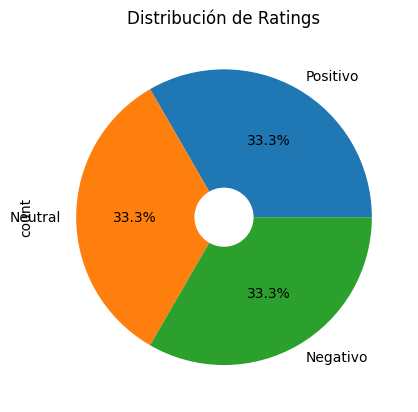

In [58]:
df2["Sentimiento"].value_counts().plot(kind ="pie" , autopct='%1.1f%%', explode=(0,0,0), wedgeprops=dict(width=0.8))
plt.title("Distribución de Ratings")

In [60]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4995 entries, 0 to 4994
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           4995 non-null   int64 
 1   ProductId    4995 non-null   object
 2   Score        4995 non-null   int64 
 3   Summary      4995 non-null   object
 4   Text         4995 non-null   object
 5   Sentimiento  4995 non-null   object
dtypes: int64(2), object(4)
memory usage: 234.3+ KB


In [61]:
import spacy
import re
nlp = spacy.load('en_core_web_sm')

In [62]:
def remove_html(texto):
  
    return re.sub(r'<[^>]+>', '', texto)

def remove_urls(texto):
    return re.sub(r'http[s]?://\S+|www\.\S+', '', texto)

def Tokenizador(texto):
    doc = nlp(texto)
    lista_tokens=[word.text.strip().lower() for word in doc if len(word.text.strip()) > 0]
    return lista_tokens

def remove_words(textoTokenizado):
    doc = nlp(" ".join(textoTokenizado))
    TextoLimpioTokenizado = [word.text for word in doc if (not word.is_stop | word.is_punct) and word.orth_ != ' ']
    return TextoLimpioTokenizado

def lematizador(TextoLimpioTokenizado):
    doc = nlp(" ".join(TextoLimpioTokenizado))
    #listaTokensLematizados=[word.lemma_ for word in doc]
    listaTokensLematizados=[word.lemma_ for word in doc if len(word.text)>2]
    return listaTokensLematizados

#Normalizador
def Pipeline(texto):
    texto= remove_html(texto)
    texto=remove_urls(texto)
    lista_tokens = Tokenizador(texto)
    TextoLimpioTokenizado = remove_words(lista_tokens)
    listaTokensLematizados = lematizador(TextoLimpioTokenizado)
    return listaTokensLematizados

In [63]:
#df2['ReviewTitulo_procesado'] = df2['Summary'].apply(Pipeline)
df2['ReviewTexto_procesado'] = df2['Text'].apply(Pipeline)

In [64]:
df2.head(9)

,Id,ProductId,Score,Summary,Text,Sentimiento,ReviewTexto_procesado
0,155,B000SV90J8,5,JELL-O,AWESOME!!! such a yummy flavor I got it as a h...,Positivo,"[awesome, yummy, flavor, get, healthy, alterna..."
1,198,B0028C44Z0,3,Sugarfree...,Be careful not to eat too many of them in one ...,Neutral,"[careful, eat, day, chemical, laxative, lololol]"
2,209,B0028C44Z0,1,These just don't do it for me as breath mints,"To me, these are nothing like the regular Alto...",Negativo,"[like, regular, altoid, breath, mint, pleasant..."
3,354,B001LMNXFA,5,Swedish Pearl is not the same as Belgian Pearl,"The Sugar was sweet, that can not be denied. ...",Positivo,"[sugar, sweet, deny, advertised, melt, bake, l..."
4,418,B000SEJ842,1,Look elsewhere for your whole grains,"A vile, miserable pancake. I put these in fron...",Negativo,"[vile, miserable, pancake, toddler, morning, a..."
5,452,B000G6RYNE,3,An Acquired Taste,"OK,I did read the reviews which ranged from sp...",Neutral,"[read, review, range, splendid, awful, take, p..."
6,557,B000G6RYNE,1,They're Not Madhouse Munchies!!!,DEfintely not as tasty as the Madhouse Munchie...,Negativo,"[defintely, tasty, madhouse, munchie, family, ..."
7,562,B000G6RYNE,1,The bags were damaged with holes and stains.,The chips were great...for the first few bags....,Negativo,"[chip, great, bag, bag, notice, remain, bag, d..."
8,567,B000G6RYNE,1,HORRIBLE I CANT BELIEVE THIS!,"Terrible! I cannot believe this, I received th...",Negativo,"[terrible, believe, receive, item, single, bag..."


In [65]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

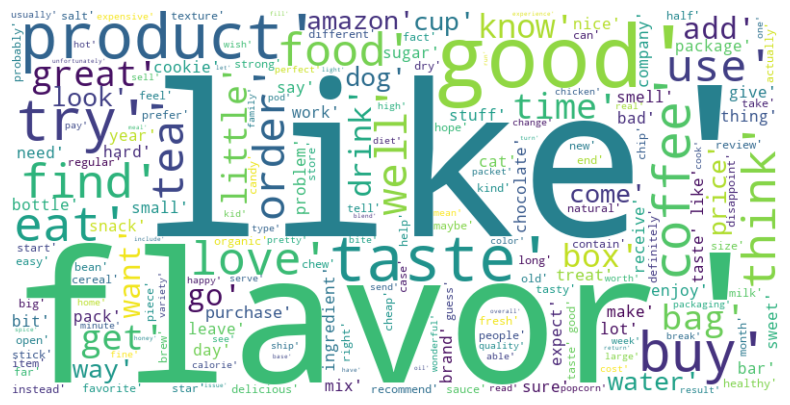

In [66]:
texto_titulos = " ".join(review for review in df2["ReviewTexto_procesado"].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_titulos)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [68]:
top =df2["ProductId"].value_counts(normalize=1)*100
top

ProductId
B004JRKEH4    0.22022
B0026RQTGE    0.22022
B006N3IG4K    0.22022
B005VOONLW    0.20020
B006Q820X0    0.18018
               ...   
B003V32M22    0.02002
B0030VBRCG    0.02002
B000EMW5N4    0.02002
B001EO5QPA    0.02002
B0039CLK78    0.02002
Name: proportion, Length: 3744, dtype: float64

In [69]:
top.keys()[:5]

Index(['B004JRKEH4', 'B0026RQTGE', 'B006N3IG4K', 'B005VOONLW', 'B006Q820X0'], dtype='object', name='ProductId')

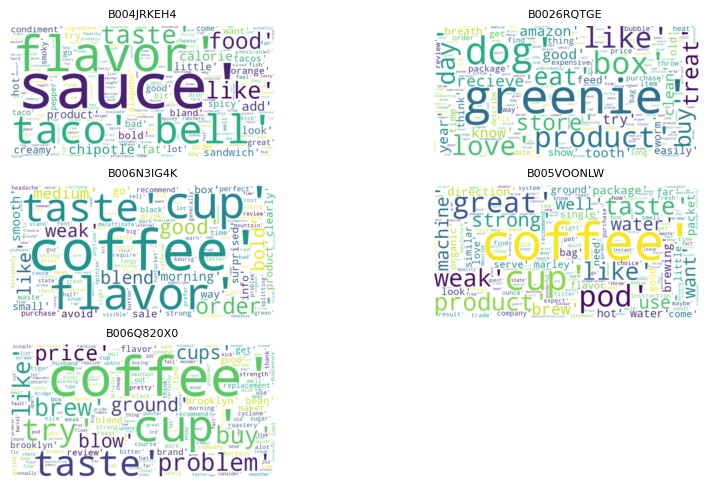

In [70]:
plt.figure(figsize=(10,10))
for i,producto in enumerate(top.keys()[:5]):
    plt.subplot(5,2,i+1)
    texto_titulos = " ".join(review for review in df2[df2["ProductId"]==producto]["ReviewTexto_procesado"].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_titulos)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(producto,fontsize =8)
    plt.axis('off')
    #plt.show()



<Axes: ylabel='Score'>

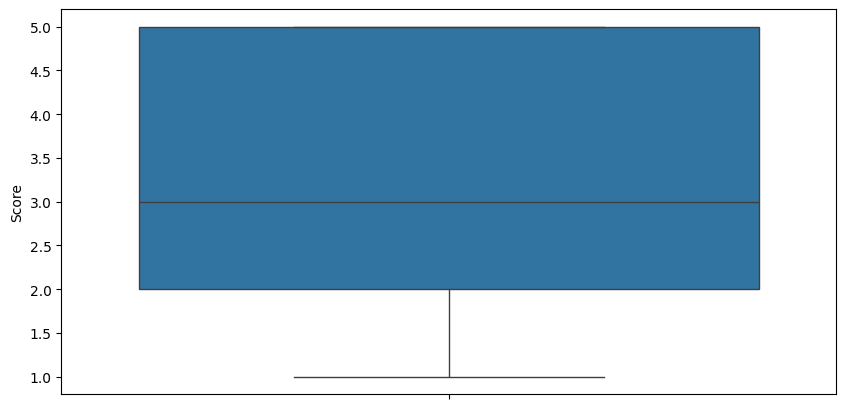

In [71]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df2,y="Score")

In [73]:
df2['JoinedReviewProcesada'] = df2['ReviewTexto_procesado'].apply(lambda x: " ".join(x))

In [74]:
df2

,Id,ProductId,Score,Summary,Text,Sentimiento,ReviewTexto_procesado,JoinedReviewProcesada
0,155,B000SV90J8,5,JELL-O,AWESOME!!! such a yummy flavor I got it as a h...,Positivo,"[awesome, yummy, flavor, get, healthy, alterna...",awesome yummy flavor get healthy alternative d...
1,198,B0028C44Z0,3,Sugarfree...,Be careful not to eat too many of them in one ...,Neutral,"[careful, eat, day, chemical, laxative, lololol]",careful eat day chemical laxative lololol
2,209,B0028C44Z0,1,These just don't do it for me as breath mints,"To me, these are nothing like the regular Alto...",Negativo,"[like, regular, altoid, breath, mint, pleasant...",like regular altoid breath mint pleasant taste...
3,354,B001LMNXFA,5,Swedish Pearl is not the same as Belgian Pearl,"The Sugar was sweet, that can not be denied. ...",Positivo,"[sugar, sweet, deny, advertised, melt, bake, l...",sugar sweet deny advertised melt bake liege wa...
4,418,B000SEJ842,1,Look elsewhere for your whole grains,"A vile, miserable pancake. I put these in fron...",Negativo,"[vile, miserable, pancake, toddler, morning, a...",vile miserable pancake toddler morning actuall...
...,...,...,...,...,...,...,...,...
4990,568015,B0030VJ8YU,3,Too Thick,I bought this flavor along with two others and...,Neutral,"[buy, flavor, surprise, different, texture, co...",buy flavor surprise different texture compare ...
4991,568064,B0030VJ8YU,5,Loved by my 8 month old!,"Being an organic, health conscious family, we ...",Positivo,"[organic, health, conscious, family, turn, hap...",organic health conscious family turn happy bab...
4992,568067,B0030VJ8YU,1,Yucky!,My son loves all of the Happy Baby meals he's ...,Negativo,"[son, love, happy, baby, meal, tried, literall...",son love happy baby meal tried literally gag t...
4993,568171,B004VEWTTQ,3,why is it wet?,the salt is wet and i dont like that. it's not...,Neutral,"[salt, wet, like, dripping, moist, clumping, o...",salt wet like dripping moist clumping oven typ...


In [75]:
df_main = df2[["Id","JoinedReviewProcesada","Score","Sentimiento",]].copy()

In [76]:
df_main[['Id',"JoinedReviewProcesada"]].iloc[2].values

array([209,
       'like regular altoid breath mint pleasant taste little candy cute convenient tin far go mintiness strong wintergreen definitely weak peppermint minis dragon breath person mint small effect breath freshen breath short maybe minute point think icebreaker frost mint good sugar free breath mint'],
      dtype=object)

In [77]:
df2[["Id","Text"]].iloc[2].values

array([209,
       "To me, these are nothing like the regular Altoids and are not breath mints. They are pleasant-tasting little candies in a cute convenient tin, and that's as far as it goes. The mintiness is just not strong, and the wintergreens are definitely weaker than the peppermint minis. I'm not a dragon-breath person, but still, one of these mints is too small to have any effect on my breath. Four or five will freshen my breath for a short while - maybe 15 minutes. At this point, I think the Icebreakers Frost mints are the best as sugar free breath mints."],
      dtype=object)

In [78]:
df_main = df_main.loc[:,["JoinedReviewProcesada","Sentimiento"]]

## Modelado

In [4]:
import pandas as pd
#df_main.to_csv("data/DataForModeling.csv", index=False)
#df_main = pd.read_csv("data/DataForModeling.csv")

#df_main.to_csv("data/DataForModelingV2.csv", index=False)
df_main = pd.read_csv("data/DataForModelingV2.csv")

In [5]:
from sklearn.model_selection import train_test_split


In [6]:
X = df_main["JoinedReviewProcesada"]
y = df_main["Sentimiento"].map({"Positivo":2,"Negativo":0,"Neutral":1})

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [8]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42,stratify=y_train)

In [9]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")




In [10]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)  # 3 etiquetas: positivo, negativo, neutral


c:\Users\karim\anaconda3\envs\DataScience\Lib\site-packages\transformers\modeling_utils.py:1439: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(resolv

In [11]:
#Hallamos la longitud promedio de las reviews
train_lens = [len(i.split()) for i in X] 
print("Mean length: ", np.mean(train_lens))

Mean length:  36.573573573573576


In [12]:
def tokenize_function(texts):
    return tokenizer(
        texts.tolist(),
        truncation=True,
        padding=True,
        max_length=128,
        return_tensors="pt"
    )

train_encodings = tokenize_function(x_train)
val_encodings = tokenize_function(x_val)
test_encodings = tokenize_function(x_test)

In [14]:
import torch

class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.values

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Crear los datasets
train_dataset = SentimentDataset(train_encodings, y_train)
val_dataset = SentimentDataset(val_encodings, y_val)
test_dataset = SentimentDataset(test_encodings, y_test)


In [45]:
training_args = TrainingArguments(
    output_dir='./results',         
    num_train_epochs=4,             
    per_device_train_batch_size=32,  
    per_device_eval_batch_size=64,   
    warmup_steps=500,               
    weight_decay=0.01,              
    logging_steps=10,
    evaluation_strategy="epoch",    
    save_strategy="epoch",
    load_best_model_at_end=True,
    fp16=True,  
)


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [46]:
trainer = Trainer(model=model, args=training_args, train_dataset=train_dataset, eval_dataset=val_dataset)

trainer.train()

Using amp half precision backend
c:\Users\karim\anaconda3\envs\DataScience\Lib\site-packages\transformers\trainer.py:474: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()
c:\Users\karim\anaconda3\envs\DataScience\Lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 3596
  Num Epochs = 4
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 452


  0%|          | 0/452 [00:00<?, ?it/s]

c:\Users\karim\anaconda3\envs\DataScience\Lib\site-packages\transformers\trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)


{'loss': 0.9475, 'learning_rate': 9e-07, 'epoch': 0.09}
{'loss': 0.9363, 'learning_rate': 1.9e-06, 'epoch': 0.18}
{'loss': 0.882, 'learning_rate': 2.9e-06, 'epoch': 0.27}
{'loss': 0.7873, 'learning_rate': 3.9e-06, 'epoch': 0.35}
{'loss': 0.8268, 'learning_rate': 4.9000000000000005e-06, 'epoch': 0.44}
{'loss': 0.7925, 'learning_rate': 5.9e-06, 'epoch': 0.53}
{'loss': 0.8171, 'learning_rate': 6.900000000000001e-06, 'epoch': 0.62}
{'loss': 0.8987, 'learning_rate': 7.9e-06, 'epoch': 0.71}
{'loss': 0.7639, 'learning_rate': 8.9e-06, 'epoch': 0.8}
{'loss': 0.7704, 'learning_rate': 9.900000000000002e-06, 'epoch': 0.88}
{'loss': 0.7646, 'learning_rate': 1.09e-05, 'epoch': 0.97}


***** Running Evaluation *****
  Num examples = 400
  Batch size = 64


  0%|          | 0/7 [00:00<?, ?it/s]

Saving model checkpoint to ./results\checkpoint-113
Configuration saved in ./results\checkpoint-113\config.json


{'eval_loss': 0.7800178527832031, 'eval_runtime': 0.775, 'eval_samples_per_second': 516.107, 'eval_steps_per_second': 9.032, 'epoch': 1.0}


Model weights saved in ./results\checkpoint-113\pytorch_model.bin
c:\Users\karim\anaconda3\envs\DataScience\Lib\site-packages\transformers\trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)


{'loss': 0.8222, 'learning_rate': 1.19e-05, 'epoch': 1.06}
{'loss': 0.7858, 'learning_rate': 1.29e-05, 'epoch': 1.15}
{'loss': 0.7053, 'learning_rate': 1.3800000000000002e-05, 'epoch': 1.24}
{'loss': 0.7194, 'learning_rate': 1.48e-05, 'epoch': 1.33}
{'loss': 0.6905, 'learning_rate': 1.58e-05, 'epoch': 1.42}
{'loss': 0.7524, 'learning_rate': 1.6800000000000002e-05, 'epoch': 1.5}
{'loss': 0.688, 'learning_rate': 1.78e-05, 'epoch': 1.59}
{'loss': 0.7148, 'learning_rate': 1.88e-05, 'epoch': 1.68}
{'loss': 0.7905, 'learning_rate': 1.9800000000000004e-05, 'epoch': 1.77}
{'loss': 0.7436, 'learning_rate': 2.08e-05, 'epoch': 1.86}
{'loss': 0.7392, 'learning_rate': 2.18e-05, 'epoch': 1.95}


***** Running Evaluation *****
  Num examples = 400
  Batch size = 64


  0%|          | 0/7 [00:00<?, ?it/s]

Saving model checkpoint to ./results\checkpoint-226
Configuration saved in ./results\checkpoint-226\config.json


{'eval_loss': 0.7451240420341492, 'eval_runtime': 0.759, 'eval_samples_per_second': 527.022, 'eval_steps_per_second': 9.223, 'epoch': 2.0}


Model weights saved in ./results\checkpoint-226\pytorch_model.bin
c:\Users\karim\anaconda3\envs\DataScience\Lib\site-packages\transformers\trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)


{'loss': 0.6633, 'learning_rate': 2.2800000000000002e-05, 'epoch': 2.04}
{'loss': 0.6618, 'learning_rate': 2.38e-05, 'epoch': 2.12}
{'loss': 0.6535, 'learning_rate': 2.48e-05, 'epoch': 2.21}
{'loss': 0.5858, 'learning_rate': 2.58e-05, 'epoch': 2.3}
{'loss': 0.5316, 'learning_rate': 2.6800000000000004e-05, 'epoch': 2.39}
{'loss': 0.6184, 'learning_rate': 2.7800000000000005e-05, 'epoch': 2.48}
{'loss': 0.602, 'learning_rate': 2.88e-05, 'epoch': 2.57}
{'loss': 0.6398, 'learning_rate': 2.98e-05, 'epoch': 2.65}
{'loss': 0.5749, 'learning_rate': 3.08e-05, 'epoch': 2.74}
{'loss': 0.5293, 'learning_rate': 3.18e-05, 'epoch': 2.83}
{'loss': 0.6177, 'learning_rate': 3.2800000000000004e-05, 'epoch': 2.92}


***** Running Evaluation *****
  Num examples = 400
  Batch size = 64


  0%|          | 0/7 [00:00<?, ?it/s]

Saving model checkpoint to ./results\checkpoint-339
Configuration saved in ./results\checkpoint-339\config.json


{'eval_loss': 0.7600865364074707, 'eval_runtime': 0.834, 'eval_samples_per_second': 479.617, 'eval_steps_per_second': 8.393, 'epoch': 3.0}


Model weights saved in ./results\checkpoint-339\pytorch_model.bin
c:\Users\karim\anaconda3\envs\DataScience\Lib\site-packages\transformers\trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)


{'loss': 0.6382, 'learning_rate': 3.38e-05, 'epoch': 3.01}
{'loss': 0.4228, 'learning_rate': 3.48e-05, 'epoch': 3.1}
{'loss': 0.4216, 'learning_rate': 3.58e-05, 'epoch': 3.19}
{'loss': 0.4514, 'learning_rate': 3.68e-05, 'epoch': 3.27}
{'loss': 0.3873, 'learning_rate': 3.7800000000000004e-05, 'epoch': 3.36}
{'loss': 0.4063, 'learning_rate': 3.88e-05, 'epoch': 3.45}
{'loss': 0.4076, 'learning_rate': 3.9800000000000005e-05, 'epoch': 3.54}
{'loss': 0.4829, 'learning_rate': 4.08e-05, 'epoch': 3.63}
{'loss': 0.4511, 'learning_rate': 4.18e-05, 'epoch': 3.72}
{'loss': 0.3698, 'learning_rate': 4.2800000000000004e-05, 'epoch': 3.81}
{'loss': 0.4785, 'learning_rate': 4.38e-05, 'epoch': 3.89}
{'loss': 0.4538, 'learning_rate': 4.4800000000000005e-05, 'epoch': 3.98}


***** Running Evaluation *****
  Num examples = 400
  Batch size = 64


  0%|          | 0/7 [00:00<?, ?it/s]

Saving model checkpoint to ./results\checkpoint-452
Configuration saved in ./results\checkpoint-452\config.json


{'eval_loss': 0.9316242337226868, 'eval_runtime': 0.821, 'eval_samples_per_second': 487.223, 'eval_steps_per_second': 8.526, 'epoch': 4.0}


Model weights saved in ./results\checkpoint-452\pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ./results\checkpoint-226 (score: 0.7451240420341492).
c:\Users\karim\anaconda3\envs\DataScience\Lib\site-packages\transformers\trainer.py:1535: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend yo

{'train_runtime': 124.0156, 'train_samples_per_second': 115.985, 'train_steps_per_second': 3.645, 'train_loss': 0.6521816857620678, 'epoch': 4.0}


TrainOutput(global_step=452, training_loss=0.6521816857620678, metrics={'train_runtime': 124.0156, 'train_samples_per_second': 115.985, 'train_steps_per_second': 3.645, 'train_loss': 0.6521816857620678, 'epoch': 4.0})

In [47]:
trainer.evaluate(test_dataset)

***** Running Evaluation *****
  Num examples = 999
  Batch size = 64
c:\Users\karim\anaconda3\envs\DataScience\Lib\site-packages\transformers\trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)


  0%|          | 0/16 [00:00<?, ?it/s]

{'eval_loss': 0.7939993143081665,
 'eval_runtime': 1.976,
 'eval_samples_per_second': 505.567,
 'eval_steps_per_second': 8.097,
 'epoch': 4.0}

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score

In [49]:
y_true = [item['labels'].item() for item in test_dataset]


predictions = trainer.predict(test_dataset)
y_pred = predictions.predictions.argmax(axis=-1)

print(classification_report(y_true, y_pred, target_names=["Positivo", "Negativo", "Neutral"]))

***** Running Prediction *****
  Num examples = 999
  Batch size = 64


  0%|          | 0/16 [00:00<?, ?it/s]

              precision    recall  f1-score   support

    Positivo       0.69      0.64      0.67       333
    Negativo       0.53      0.61      0.56       333
     Neutral       0.75      0.69      0.72       333

    accuracy                           0.65       999
   macro avg       0.66      0.65      0.65       999
weighted avg       0.66      0.65      0.65       999



In [56]:
print("Accuracy: ",accuracy_score(y_true, y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_true, y_pred))
print("F1 Score: ",f1_score(y_true, y_pred,average='weighted'))

Accuracy:  0.6466466466466466
Confusion Matrix: 
 [[214  94  25]
 [ 80 203  50]
 [ 15  89 229]]
F1 Score:  0.6501117047510848


<Axes: >

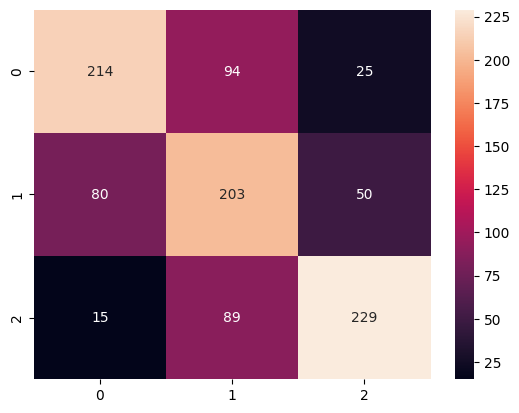

In [51]:
sns.heatmap(confusion_matrix(y_true,y_pred), annot=True, fmt="d")

In [ ]:
# Guardar modelo y tokenizer en una carpeta
#trainer.save_model("/modelo/bert1")  # Cambia "path_to_save_model" por tu ruta deseada
#tokenizer.save_pretrained("/modelo/tokenizer1")


Saving model checkpoint to /modelo/bert1
Configuration saved in /modelo/bert1\config.json
Model weights saved in /modelo/bert1\pytorch_model.bin
tokenizer config file saved in /modelo/tokenizer1\tokenizer_config.json
Special tokens file saved in /modelo/tokenizer1\special_tokens_map.json


('/modelo/tokenizer1\\tokenizer_config.json',
 '/modelo/tokenizer1\\special_tokens_map.json',
 '/modelo/tokenizer1\\vocab.txt',
 '/modelo/tokenizer1\\added_tokens.json',
 '/modelo/tokenizer1\\tokenizer.json')

In [53]:
from transformers import BertForSequenceClassification, BertTokenizerFast

# Cargar modelo y tokenizer
model = BertForSequenceClassification.from_pretrained("modelo/bert1")
tokenizer = BertTokenizerFast.from_pretrained("modelo/tokenizer1")

loading configuration file modelo/bert1\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.17.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file modelo/bert1\pytorch_

In [54]:
import torch

# Texto de entrada
texto = "The product was great!! However, the only thing i did not like was the packaging"

# Tokenizar el texto
inputs = tokenizer(texto, return_tensors="pt", truncation=True, padding=True)

# Realizar la predicción
with torch.no_grad():
    outputs = model(**inputs)

# Obtener las predicciones
logits = outputs.logits
predicciones = torch.argmax(logits, dim=1)

# Interpretar los resultados
print(f"Predicción: {predicciones.item()}")

Predicción: 2


## Optimizacion de hiperParametros 

In [55]:
import optuna
from transformers import Trainer, TrainingArguments
from sklearn.metrics import f1_score
import numpy as np

# Definir la función de evaluación
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    f1 = f1_score(labels, predictions, average="macro")  # Cambia "macro" según tu preferencia
    return {"f1": f1}

def objective(trial):
    # Espacio de búsqueda para hiperparámetros
    num_train_epochs = trial.suggest_int("num_train_epochs", 2, 3)
    per_device_train_batch_size = trial.suggest_categorical("per_device_train_batch_size", [8, 16, 32])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 5e-5)
    warmup_steps = trial.suggest_int("warmup_steps", 0, 500)
    weight_decay = trial.suggest_uniform("weight_decay", 0.0, 0.3)
    
    # Configuración de argumentos de entrenamiento
    training_args = TrainingArguments(
        output_dir="./results",
        num_train_epochs=num_train_epochs,
        per_device_train_batch_size=per_device_train_batch_size,
        per_device_eval_batch_size=64,
        learning_rate=learning_rate,
        warmup_steps=warmup_steps,
        weight_decay=weight_decay,
        evaluation_strategy="epoch",
        save_strategy="no",
        logging_dir="./logs",
        logging_steps=10,
        load_best_model_at_end=False,
        fp16=True,  # Activar precisión mixta si la GPU lo soporta
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_metrics,
    )

    
    trainer.train()

    eval_result = trainer.evaluate()

    return eval_result["eval_f1"]

study = optuna.create_study(direction="maximize")  
study.optimize(objective, n_trials=20)  

print("Mejores hiperparámetros:", study.best_params)


{'loss': 0.0941, 'learning_rate': 1.2687096134389082e-05, 'epoch': 2.22}
{'loss': 0.0529, 'learning_rate': 1.2041989551284552e-05, 'epoch': 2.27}
{'loss': 0.1673, 'learning_rate': 1.1396882968180023e-05, 'epoch': 2.31}
{'loss': 0.0932, 'learning_rate': 1.0680097875841657e-05, 'epoch': 2.36}
{'loss': 0.0377, 'learning_rate': 9.963312783503292e-06, 'epoch': 2.4}
{'loss': 0.0433, 'learning_rate': 9.246527691164923e-06, 'epoch': 2.44}
{'loss': 0.0001, 'learning_rate': 8.529742598826558e-06, 'epoch': 2.49}
{'loss': 0.0001, 'learning_rate': 7.812957506488193e-06, 'epoch': 2.53}
{'loss': 0.0635, 'learning_rate': 7.096172414149826e-06, 'epoch': 2.58}
{'loss': 0.0034, 'learning_rate': 6.37938732181146e-06, 'epoch': 2.62}
{'loss': 0.0, 'learning_rate': 5.6626022294730935e-06, 'epoch': 2.67}
{'loss': 0.066, 'learning_rate': 4.945817137134727e-06, 'epoch': 2.71}
{'loss': 0.0, 'learning_rate': 4.229032044796361e-06, 'epoch': 2.76}
{'loss': 0.0814, 'learning_rate': 3.5122469524579946e-06, 'epoch': 2

***** Running Evaluation *****
  Num examples = 400
  Batch size = 64


  0%|          | 0/7 [00:00<?, ?it/s]



Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Evaluation *****
  Num examples = 400
  Batch size = 64


{'eval_loss': 3.7719953060150146, 'eval_f1': 0.6305483683846131, 'eval_runtime': 2.3863, 'eval_samples_per_second': 167.621, 'eval_steps_per_second': 2.933, 'epoch': 3.0}
{'train_runtime': 195.5006, 'train_samples_per_second': 55.181, 'train_steps_per_second': 3.453, 'train_loss': 0.013404767553742945, 'epoch': 3.0}


c:\Users\karim\anaconda3\envs\DataScience\Lib\site-packages\transformers\trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)


  0%|          | 0/7 [00:00<?, ?it/s]

[I 2024-11-16 21:16:39,973] Trial 18 finished with value: 0.6305483683846131 and parameters: {'num_train_epochs': 3, 'per_device_train_batch_size': 16, 'learning_rate': 1.806298432692683e-05, 'warmup_steps': 423, 'weight_decay': 0.26604827047325585}. Best is trial 9 with value: 0.6837178206563065.
C:\Users\karim\AppData\Local\Temp\ipykernel_51768\3386169356.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 5e-5)
C:\Users\karim\AppData\Local\Temp\ipykernel_51768\3386169356.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform("weight_decay", 0.0, 0.3)
PyTorch: setting up devices
The defa

  0%|          | 0/1350 [00:00<?, ?it/s]

c:\Users\karim\anaconda3\envs\DataScience\Lib\site-packages\transformers\trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)


{'loss': 0.0001, 'learning_rate': 7.451024315343322e-07, 'epoch': 0.02}
{'loss': 0.0, 'learning_rate': 1.4902048630686644e-06, 'epoch': 0.04}
{'loss': 0.0596, 'learning_rate': 2.1607970514495637e-06, 'epoch': 0.07}
{'loss': 0.0001, 'learning_rate': 2.905899482983896e-06, 'epoch': 0.09}
{'loss': 0.0, 'learning_rate': 3.651001914518228e-06, 'epoch': 0.11}
{'loss': 0.0, 'learning_rate': 4.3961043460525605e-06, 'epoch': 0.13}
{'loss': 0.0, 'learning_rate': 5.1412067775868925e-06, 'epoch': 0.16}
{'loss': 0.0, 'learning_rate': 5.886309209121225e-06, 'epoch': 0.18}
{'loss': 0.0002, 'learning_rate': 6.631411640655558e-06, 'epoch': 0.2}
{'loss': 0.1392, 'learning_rate': 7.302003829036456e-06, 'epoch': 0.22}
{'loss': 0.1143, 'learning_rate': 7.972596017417355e-06, 'epoch': 0.24}
{'loss': 0.0, 'learning_rate': 8.717698448951688e-06, 'epoch': 0.27}
{'loss': 0.0, 'learning_rate': 9.46280088048602e-06, 'epoch': 0.29}
{'loss': 0.0, 'learning_rate': 1.0207903312020354e-05, 'epoch': 0.31}
{'loss': 0.0,

***** Running Evaluation *****
  Num examples = 400
  Batch size = 64


{'loss': 0.0001, 'learning_rate': 2.08408980403632e-05, 'epoch': 1.0}


  0%|          | 0/7 [00:00<?, ?it/s]

{'eval_loss': 3.3262200355529785, 'eval_f1': 0.6503288573511613, 'eval_runtime': 1.083, 'eval_samples_per_second': 369.333, 'eval_steps_per_second': 6.463, 'epoch': 1.0}


c:\Users\karim\anaconda3\envs\DataScience\Lib\site-packages\transformers\trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)


{'loss': 0.0346, 'learning_rate': 2.061035713283706e-05, 'epoch': 1.02}
{'loss': 0.1933, 'learning_rate': 2.037981622531092e-05, 'epoch': 1.04}
{'loss': 0.0639, 'learning_rate': 2.0149275317784778e-05, 'epoch': 1.07}
{'loss': 0.0001, 'learning_rate': 1.9918734410258635e-05, 'epoch': 1.09}
{'loss': 0.0881, 'learning_rate': 1.9688193502732492e-05, 'epoch': 1.11}
{'loss': 0.0001, 'learning_rate': 1.9457652595206353e-05, 'epoch': 1.13}
{'loss': 0.0026, 'learning_rate': 1.922711168768021e-05, 'epoch': 1.16}
{'loss': 0.0772, 'learning_rate': 1.899657078015407e-05, 'epoch': 1.18}
{'loss': 0.0001, 'learning_rate': 1.8766029872627927e-05, 'epoch': 1.2}
{'loss': 0.0, 'learning_rate': 1.8535488965101787e-05, 'epoch': 1.22}
{'loss': 0.1167, 'learning_rate': 1.8304948057575644e-05, 'epoch': 1.24}
{'loss': 0.1338, 'learning_rate': 1.80744071500495e-05, 'epoch': 1.27}
{'loss': 0.0341, 'learning_rate': 1.7843866242523362e-05, 'epoch': 1.29}
{'loss': 0.0001, 'learning_rate': 1.761332533499722e-05, 'epo

***** Running Evaluation *****
  Num examples = 400
  Batch size = 64


{'loss': 0.0001, 'learning_rate': 1.046655720168683e-05, 'epoch': 2.0}


  0%|          | 0/7 [00:00<?, ?it/s]

{'eval_loss': 3.2134101390838623, 'eval_f1': 0.6422016950185964, 'eval_runtime': 0.9442, 'eval_samples_per_second': 423.635, 'eval_steps_per_second': 7.414, 'epoch': 2.0}


c:\Users\karim\anaconda3\envs\DataScience\Lib\site-packages\transformers\trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)


{'loss': 0.0162, 'learning_rate': 1.0236016294160687e-05, 'epoch': 2.02}
{'loss': 0.0019, 'learning_rate': 1.0005475386634546e-05, 'epoch': 2.04}
{'loss': 0.043, 'learning_rate': 9.774934479108405e-06, 'epoch': 2.07}
{'loss': 0.0, 'learning_rate': 9.544393571582263e-06, 'epoch': 2.09}
{'loss': 0.0, 'learning_rate': 9.313852664056122e-06, 'epoch': 2.11}
{'loss': 0.0001, 'learning_rate': 9.083311756529979e-06, 'epoch': 2.13}
{'loss': 0.0342, 'learning_rate': 8.85277084900384e-06, 'epoch': 2.16}
{'loss': 0.0, 'learning_rate': 8.622229941477696e-06, 'epoch': 2.18}
{'loss': 0.0052, 'learning_rate': 8.391689033951555e-06, 'epoch': 2.2}
{'loss': 0.0001, 'learning_rate': 8.161148126425412e-06, 'epoch': 2.22}
{'loss': 0.0, 'learning_rate': 7.930607218899273e-06, 'epoch': 2.24}
{'loss': 0.0044, 'learning_rate': 7.70006631137313e-06, 'epoch': 2.27}
{'loss': 0.0431, 'learning_rate': 7.469525403846988e-06, 'epoch': 2.29}
{'loss': 0.0, 'learning_rate': 7.238984496320848e-06, 'epoch': 2.31}
{'loss': 

***** Running Evaluation *****
  Num examples = 400
  Batch size = 64


{'loss': 0.0, 'learning_rate': 9.221636301045665e-08, 'epoch': 3.0}


  0%|          | 0/7 [00:00<?, ?it/s]



Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Evaluation *****
  Num examples = 400
  Batch size = 64


{'eval_loss': 3.3949294090270996, 'eval_f1': 0.6390021175448647, 'eval_runtime': 1.3252, 'eval_samples_per_second': 301.833, 'eval_steps_per_second': 5.282, 'epoch': 3.0}
{'train_runtime': 196.3977, 'train_samples_per_second': 54.929, 'train_steps_per_second': 6.874, 'train_loss': 0.03533068985850723, 'epoch': 3.0}


c:\Users\karim\anaconda3\envs\DataScience\Lib\site-packages\transformers\trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)


  0%|          | 0/7 [00:00<?, ?it/s]

[I 2024-11-16 21:19:57,201] Trial 19 finished with value: 0.6390021175448647 and parameters: {'num_train_epochs': 3, 'per_device_train_batch_size': 8, 'learning_rate': 2.37687675659452e-05, 'warmup_steps': 319, 'weight_decay': 0.12933887095525462}. Best is trial 9 with value: 0.6837178206563065.


Mejores hiperparámetros: {'num_train_epochs': 3, 'per_device_train_batch_size': 16, 'learning_rate': 2.9148232393184987e-05, 'warmup_steps': 411, 'weight_decay': 0.10858090634376606}


In [58]:
from transformers import TrainingArguments

best_params = study.best_params

training_argsv2 = TrainingArguments(
    output_dir="./results_best",  # Nuevo directorio para guardar resultados
    num_train_epochs=best_params["num_train_epochs"],
    per_device_train_batch_size=best_params["per_device_train_batch_size"],
    learning_rate=best_params["learning_rate"],
    warmup_steps=best_params["warmup_steps"],
    weight_decay=best_params["weight_decay"],
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs_best",
    logging_steps=10,
    fp16=True,  # Si fue parte de los hiperparámetros evaluados
)

from transformers import Trainer

trainer_best = Trainer(
    model=model,  # El modelo debe ser el mismo o reentrenado con los mejores parámetros
    args=training_argsv2,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,  # Función de métricas definida previamente
)

trainer_best.train()
trainer_best.evaluate(test_dataset)

predictionsv2 = trainer_best.predict(test_dataset)
y_predv2 = predictionsv2.predictions.argmax(axis=-1)

y_true = [item['labels'].item() for item in test_dataset]




print(classification_report(y_true, y_pred, target_names=["Positivo", "Negativo", "Neutral"]))

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
Using amp half precision backend
***** Running training *****
  Num examples = 3596
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 675


  0%|          | 0/675 [00:00<?, ?it/s]

{'loss': 0.0, 'learning_rate': 7.09202734627372e-07, 'epoch': 0.04}
{'loss': 0.042, 'learning_rate': 1.3474851957920067e-06, 'epoch': 0.09}
{'loss': 0.0, 'learning_rate': 2.0566879304193785e-06, 'epoch': 0.13}
{'loss': 0.0, 'learning_rate': 2.7658906650467503e-06, 'epoch': 0.18}
{'loss': 0.0, 'learning_rate': 3.4750933996741225e-06, 'epoch': 0.22}
{'loss': 0.0, 'learning_rate': 4.184296134301494e-06, 'epoch': 0.27}
{'loss': 0.0, 'learning_rate': 4.893498868928866e-06, 'epoch': 0.31}
{'loss': 0.0, 'learning_rate': 5.602701603556238e-06, 'epoch': 0.36}
{'loss': 0.0, 'learning_rate': 6.31190433818361e-06, 'epoch': 0.4}
{'loss': 0.0, 'learning_rate': 7.021107072810982e-06, 'epoch': 0.44}
{'loss': 0.0196, 'learning_rate': 7.659389533975618e-06, 'epoch': 0.49}
{'loss': 0.0, 'learning_rate': 8.368592268602988e-06, 'epoch': 0.53}
{'loss': 0.0, 'learning_rate': 9.077795003230361e-06, 'epoch': 0.58}
{'loss': 0.0, 'learning_rate': 9.786997737857732e-06, 'epoch': 0.62}
{'loss': 0.0001, 'learning_r

***** Running Evaluation *****
  Num examples = 400
  Batch size = 8


  0%|          | 0/50 [00:00<?, ?it/s]

Saving model checkpoint to ./results_best\checkpoint-225
Configuration saved in ./results_best\checkpoint-225\config.json


{'eval_loss': 3.8689932823181152, 'eval_f1': 0.6392637485970819, 'eval_runtime': 1.368, 'eval_samples_per_second': 292.398, 'eval_steps_per_second': 36.55, 'epoch': 1.0}


Model weights saved in ./results_best\checkpoint-225\pytorch_model.bin
c:\Users\karim\anaconda3\envs\DataScience\Lib\site-packages\transformers\trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)


{'loss': 0.0, 'learning_rate': 1.616982234950408e-05, 'epoch': 1.02}
{'loss': 0.063, 'learning_rate': 1.687902508413145e-05, 'epoch': 1.07}
{'loss': 0.0654, 'learning_rate': 1.751730754529609e-05, 'epoch': 1.11}
{'loss': 0.0533, 'learning_rate': 1.822651027992346e-05, 'epoch': 1.16}
{'loss': 0.0524, 'learning_rate': 1.893571301455083e-05, 'epoch': 1.2}
{'loss': 0.0001, 'learning_rate': 1.9644915749178202e-05, 'epoch': 1.24}
{'loss': 0.0, 'learning_rate': 2.0354118483805577e-05, 'epoch': 1.29}
{'loss': 0.0264, 'learning_rate': 2.1063321218432947e-05, 'epoch': 1.33}
{'loss': 0.0, 'learning_rate': 2.177252395306032e-05, 'epoch': 1.38}
{'loss': 0.0504, 'learning_rate': 2.248172668768769e-05, 'epoch': 1.42}
{'loss': 0.0436, 'learning_rate': 2.3190929422315064e-05, 'epoch': 1.47}
{'loss': 0.4265, 'learning_rate': 2.3900132156942435e-05, 'epoch': 1.51}
{'loss': 0.0882, 'learning_rate': 2.4609334891569805e-05, 'epoch': 1.56}
{'loss': 0.1443, 'learning_rate': 2.531853762619718e-05, 'epoch': 1.6

***** Running Evaluation *****
  Num examples = 400
  Batch size = 8


{'loss': 0.0613, 'learning_rate': 2.5173473430477944e-05, 'epoch': 2.0}


  0%|          | 0/50 [00:00<?, ?it/s]

Saving model checkpoint to ./results_best\checkpoint-450
Configuration saved in ./results_best\checkpoint-450\config.json


{'eval_loss': 2.9575183391571045, 'eval_f1': 0.6289519391986185, 'eval_runtime': 1.291, 'eval_samples_per_second': 309.838, 'eval_steps_per_second': 38.73, 'epoch': 2.0}


Model weights saved in ./results_best\checkpoint-450\pytorch_model.bin
c:\Users\karim\anaconda3\envs\DataScience\Lib\site-packages\transformers\trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)


{'loss': 0.0431, 'learning_rate': 2.4069373718614878e-05, 'epoch': 2.04}
{'loss': 0.0005, 'learning_rate': 2.2965274006751805e-05, 'epoch': 2.09}
{'loss': 0.0002, 'learning_rate': 2.186117429488874e-05, 'epoch': 2.13}
{'loss': 0.0226, 'learning_rate': 2.0757074583025673e-05, 'epoch': 2.18}
{'loss': 0.0018, 'learning_rate': 1.9652974871162604e-05, 'epoch': 2.22}
{'loss': 0.0026, 'learning_rate': 1.8548875159299538e-05, 'epoch': 2.27}
{'loss': 0.128, 'learning_rate': 1.744477544743647e-05, 'epoch': 2.31}
{'loss': 0.0568, 'learning_rate': 1.63406757355734e-05, 'epoch': 2.36}
{'loss': 0.0002, 'learning_rate': 1.5236576023710333e-05, 'epoch': 2.4}
{'loss': 0.0193, 'learning_rate': 1.4132476311847267e-05, 'epoch': 2.44}
{'loss': 0.0319, 'learning_rate': 1.3028376599984199e-05, 'epoch': 2.49}
{'loss': 0.0121, 'learning_rate': 1.1924276888121131e-05, 'epoch': 2.53}
{'loss': 0.0001, 'learning_rate': 1.0820177176258063e-05, 'epoch': 2.58}
{'loss': 0.0474, 'learning_rate': 9.716077464394996e-06, 

***** Running Evaluation *****
  Num examples = 400
  Batch size = 8


  0%|          | 0/50 [00:00<?, ?it/s]

Saving model checkpoint to ./results_best\checkpoint-675
Configuration saved in ./results_best\checkpoint-675\config.json


{'eval_loss': 3.078857421875, 'eval_f1': 0.6536443907398853, 'eval_runtime': 1.335, 'eval_samples_per_second': 299.626, 'eval_steps_per_second': 37.453, 'epoch': 3.0}


Model weights saved in ./results_best\checkpoint-675\pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Evaluation *****
  Num examples = 999
  Batch size = 8


{'train_runtime': 165.5142, 'train_samples_per_second': 65.179, 'train_steps_per_second': 4.078, 'train_loss': 0.03105948163403405, 'epoch': 3.0}


c:\Users\karim\anaconda3\envs\DataScience\Lib\site-packages\transformers\trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)


  0%|          | 0/125 [00:00<?, ?it/s]

***** Running Prediction *****
  Num examples = 999
  Batch size = 8
c:\Users\karim\anaconda3\envs\DataScience\Lib\site-packages\transformers\trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)


  0%|          | 0/125 [00:00<?, ?it/s]

              precision    recall  f1-score   support

    Positivo       0.69      0.64      0.67       333
    Negativo       0.53      0.61      0.56       333
     Neutral       0.75      0.69      0.72       333

    accuracy                           0.65       999
   macro avg       0.66      0.65      0.65       999
weighted avg       0.66      0.65      0.65       999

